In [3]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'Predicting Child Birth Weight from Maternal Features.csv'
dataset = pd.read_csv(file_path)

# Group by 'LNH' to calculate class centroids and spreads
grouped = dataset.groupby('LNH')

# Calculate the centroids (means) and spreads (standard deviations) for each class
centroids = grouped.mean(numeric_only=True)
spreads = grouped.std(numeric_only=True)

# Function to calculate the Euclidean distance between centroids of two classes
def calculate_distance(class1, class2, centroids):
    centroid1 = centroids.loc[class1].values
    centroid2 = centroids.loc[class2].values
    distance = np.linalg.norm(centroid1 - centroid2)
    return distance

# Example: Calculate the distance between centroids of class 2 and class 1
distance_2_1 = calculate_distance(2.0, 1.0, centroids)

# Print centroids, spreads, and the distance between centroids of class 2 and class 1
print("Centroids:\n", centroids)
print("\nSpreads:\n", spreads)
print(f"\nDistance between centroids of class 2 and class 1: {distance_2_1}")


Centroids:
      Age(years)  Height(cm)    Parity       ANC    Iwt(kg)    FWt(kg)  \
LNH                                                                     
1.0   22.556338  146.891304  0.626761  3.556338  45.492958  51.591549   
2.0   22.856988  141.221945  0.588553  3.742981  45.614880  52.662979   
3.0   26.750000  147.750000  0.750000  4.000000  45.500000  52.750000   

        IBP_sys   IBP_dias     FBP_sys   FBP_dias   IHb(gm%)   FHb(gm%)  \
LNH                                                                       
1.0  106.161972  66.507042  108.725352  69.690141  10.372362  10.869841   
2.0  105.899132  65.805857  111.468478  70.769565   9.989857  10.531786   
3.0  105.500000  65.000000  112.750000  71.000000   9.500000  11.025000   

        BS(RBS)   BWt(kg)  
LNH                        
1.0   98.358491  2.150000  
2.0  102.450116  2.846188  
3.0  133.000000  4.350000  

Spreads:
      Age(years)  Height(cm)    Parity       ANC   Iwt(kg)   FWt(kg)  \
LNH                     

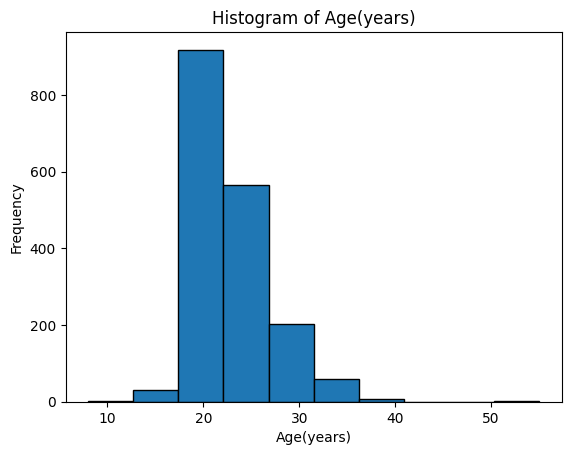

Mean: 22.986002239641657
Variance: 16.40014000895355


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Predicting Child Birth Weight from Maternal Features.csv'
dataset = pd.read_csv(file_path)

# Select the feature 'Age(years)'
feature = dataset['Age(years)']

# Handle NaN values by dropping them
feature_clean = feature.dropna()

# Calculate the histogram data
hist_data, bin_edges = np.histogram(feature_clean, bins=10)

# Plot the histogram
plt.hist(feature_clean, bins=10, edgecolor='black')
plt.title('Histogram of Age(years)')
plt.xlabel('Age(years)')
plt.ylabel('Frequency')
plt.show()

# Calculate the mean and variance of the feature
mean_value = np.mean(feature_clean)
variance_value = np.var(feature_clean)

print(f"Mean: {mean_value}")
print(f"Variance: {variance_value}")


NaN values in Age(years): 14
NaN values in Height(cm): 273
Infinite values in Age(years): 0
Infinite values in Height(cm): 0


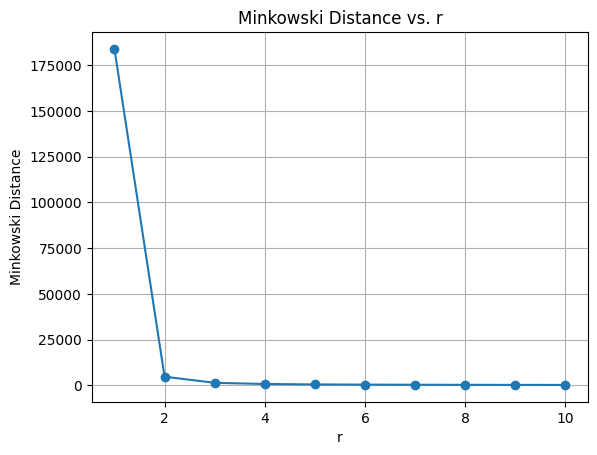

Minkowski distances for r from 1 to 10: [183802.0, 4777.262448306561, 1425.9163326825005, 783.069567727088, 548.6496795582921, 434.11425052574737, 368.15989500222145, 326.0257567991628, 297.1326279249238, 276.2802422969766]


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# Load the dataset
file_path = 'Predicting Child Birth Weight from Maternal Features.csv'
dataset = pd.read_csv(file_path)

# Select two feature vectors, e.g., 'Age(years)' and 'Height(cm)'
feature_1 = dataset['Age(years)']
feature_2 = dataset['Height(cm)']

# Check for NaN or infinite values
print("NaN values in Age(years):", feature_1.isna().sum())
print("NaN values in Height(cm):", feature_2.isna().sum())
print("Infinite values in Age(years):", np.isinf(feature_1).sum())
print("Infinite values in Height(cm):", np.isinf(feature_2).sum())

# Remove rows with NaN or infinite values
cleaned_dataset = dataset.dropna(subset=['Age(years)', 'Height(cm)'])
cleaned_dataset = cleaned_dataset[~np.isinf(cleaned_dataset['Age(years)']) & ~np.isinf(cleaned_dataset['Height(cm)'])]

# Extract cleaned feature vectors
feature_1 = cleaned_dataset['Age(years)']
feature_2 = cleaned_dataset['Height(cm)']

# Calculate the Minkowski distance for r from 1 to 10
r_values = range(1, 11)
distances = [minkowski(feature_1, feature_2, p=r) for r in r_values]

# Plot the distances
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.grid(True)
plt.show()

# Display the distances
print("Minkowski distances for r from 1 to 10:", distances)


In [40]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named df

# Define features (X) and target (y)
X = df[['Age(years)', 'Height(cm)', 'Parity', 'ANC', 'Iwt(kg)', 'FWt(kg)', 
        'IBP_sys', 'IBP_dias', 'FBP_sys', 'FBP_dias', 'IHb(gm%)', 'FHb(gm%)', 
        'BS(RBS)', 'SEC']]  # Add more features if needed
y = df['LNH']  # Assuming 'LNH' is the target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Training set shape: (1260, 14)
Test set shape: (540, 14)
y_train shape: (1260,)
y_test shape: (540,)


In [59]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset (assuming it's already loaded as df)
# df = pd.read_csv('your_dataset.csv')  # Update with the path to your dataset

# Example for checking unique class labels in 'LNH'
print("Unique class labels in 'LNH':", df['LNH'].unique())

# Define binary class labels for the example (update these as needed)
correct_labels = [1, 2]  # Replace with actual binary labels

# Filter dataset for binary classification
df_binary = df[df['LNH'].isin(correct_labels)].copy()  # Create a copy to avoid warnings

# Ensure that the filtered dataset is not empty
if df_binary.empty:
    raise ValueError("The filtered dataset is empty. Please check the class labels in the 'LNH' column.")

# Define features (X) and target (y) for the binary dataset
X = df_binary[['Age(years)', 'Height(cm)', 'Parity', 'ANC', 'Iwt(kg)', 'FWt(kg)', 
               'IBP_sys', 'IBP_dias', 'FBP_sys', 'FBP_dias', 'IHb(gm%)', 'FHb(gm%)', 
               'BS(RBS)', 'SEC']]  # Update features as needed
y = df_binary['LNH']

# Convert categorical features to numeric
if X['SEC'].dtype == 'object':
    le = LabelEncoder()
    X.loc[:, 'SEC'] = le.fit_transform(X['SEC'])  # Use .loc to avoid SettingWithCopyWarning

# Drop any rows with missing values if necessary
X = X.dropna()
y = y.loc[X.index]  # Ensure that target y matches the rows in X

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
neigh.fit(X_train, y_train)

# Make predictions
y_pred = neigh.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Unique class labels in 'LNH': [ 2.  1.  3. nan]
Accuracy: 0.79


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'Predicting Child Birth Weight from Maternal Features.csv'
df = pd.read_csv(file_path)

# Define the label column
label_column = 'LNH'  # Name of the label column

# Check the unique values in the label column to understand the classes
print(f"Unique values in '{label_column}':", df[label_column].unique())

# Handle non-numeric columns
# Convert categorical columns to numeric if they exist
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical columns before encoding: {categorical_columns}")

# Apply Label Encoding for categorical features
label_encoders = {}
for col in categorical_columns:
    if col != label_column:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separate features and labels
X = df_imputed.drop(columns=[label_column])  # Features
y = df_imputed[label_column]  # Labels

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create the kNN regressor with k=3
neigh = KNeighborsRegressor(n_neighbors=3)

# Train the regressor
neigh.fit(X_train, y_train)

# Evaluate the regressor using the test set
y_pred = neigh.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Test the accuracy of the kNN regressor using the test set
# Note: In regression, we use R^2 Score as the measure of how well the model explains the variance in the data
print(f'R^2 Score (using score method): {neigh.score(X_test, y_test):.2f}')


Unique values in 'LNH': [ 2.  1.  3. nan]
Categorical columns before encoding: Index(['SEC', 'Bgroup', 'Term/Preterm', 'Sex'], dtype='object')
Mean Squared Error: 0.06
R^2 Score: 0.23
R^2 Score (using score method): 0.23


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'Predicting Child Birth Weight from Maternal Features.csv'
df = pd.read_csv(file_path)

# Define the label column
label_column = 'LNH'  # Replace with the actual name of your label column

# Handle non-numeric columns
# Convert categorical columns to numeric if they exist
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical columns before encoding: {categorical_columns}")

# Apply Label Encoding for categorical features
label_encoders = {}
for col in categorical_columns:
    if col != label_column:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separate features and labels
X = df_imputed.drop(columns=[label_column])  # Drop the label column to get features
y = df_imputed[label_column]  # The label column

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create the kNN regressor with k=3
neigh = KNeighborsRegressor(n_neighbors=3)

# Train the regressor
neigh.fit(X_train, y_train)

# Predict the values for all test vectors
y_pred_all = neigh.predict(X_test)
print('Predicted values for all test vectors:')
print(y_pred_all)

# Predict the value for a specific test vector
# Choose a specific index from the test set to test
test_index = 0  # Replace with the index of the test vector you want to classify

# Ensure the index is within range
if test_index < len(X_test):
    test_vect = X_test[test_index].reshape(1, -1)  # Reshape to match the expected input shape

    # Perform regression
    test_prediction = neigh.predict(test_vect)
    print(f'Predicted value for test vector at index {test_index}: {test_prediction[0]}')
else:
    print(f"Index {test_index} is out of range for the test set.")

# Print regression metrics
mse = mean_squared_error(y_test, y_pred_all)
r2 = r2_score(y_test, y_pred_all)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Categorical columns before encoding: Index(['SEC', 'Bgroup', 'Term/Preterm', 'Sex'], dtype='object')
Predicted values for all test vectors:
[1.87126866 1.87126866 1.29042289 2.         1.87126866 2.
 2.         2.         2.         1.87126866 2.         1.87126866
 1.87126866 1.87126866 2.         1.87126866 2.         1.87126866
 2.         2.         2.         1.95708955 1.87126866 1.87126866
 1.66666667 1.87126866 1.9141791  1.95708955 2.         1.66666667
 2.         1.87126866 2.         1.87126866 2.         2.
 1.87126866 1.9141791  1.87126866 1.87126866 2.         1.87126866
 2.         2.         2.         1.66666667 1.87126866 2.
 1.87126866 2.         2.         1.87126866 2.         1.87126866
 2.         1.87126866 1.87126866 2.         1.87126866 1.87126866
 2.         1.95708955 2.         2.         2.         1.87126866
 1.33333333 1.87126866 2.         1.87126866 2.         2.
 2.         1.87126866 2.         1.95708955 1.95708955 1.9141791
 1.66666667 2.        

Accuracy with k=1: 0.86
Accuracy with k=2: 0.85
Accuracy with k=3: 0.88
Accuracy with k=4: 0.89
Accuracy with k=5: 0.88
Accuracy with k=6: 0.89
Accuracy with k=7: 0.88
Accuracy with k=8: 0.88
Accuracy with k=9: 0.88
Accuracy with k=10: 0.88
Accuracy with k=11: 0.87


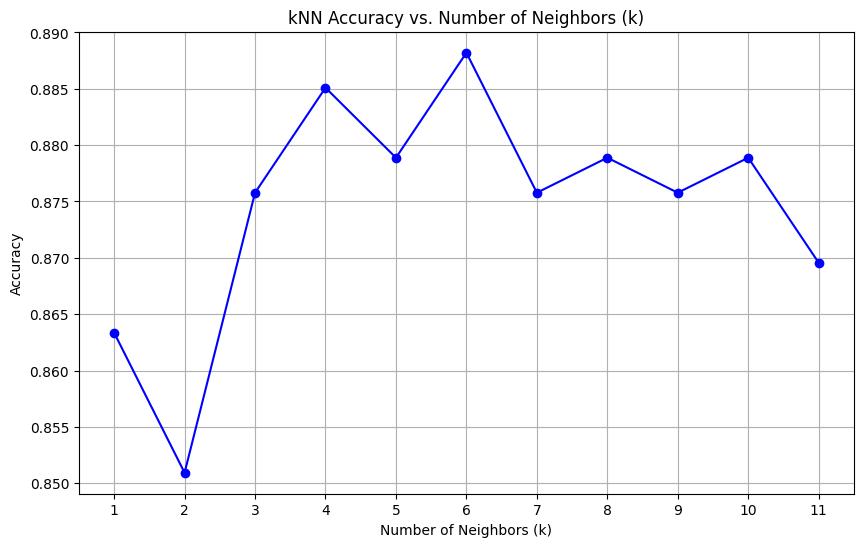


Comparison:
Accuracy with k=1: 0.86
Accuracy with k=3: 0.88


In [74]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'Predicting Child Birth Weight from Maternal Features.csv'
df = pd.read_csv(file_path)

# Define the label column
label_column = 'LNH'  # Replace with the actual name of your label column

# Separate features and labels
X = df.drop(columns=[label_column])  # Drop the label column to get features
y = df[label_column]  # The label column

# Handle missing values in the target variable
y = y.dropna()  # Drop rows with missing target values

# Align X with y after dropping missing values
X = X.loc[y.index]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Create a column transformer with imputation, one-hot encoding, and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values for numeric features
            ('scaler', StandardScaler())  # Scale numeric features
        ]), numeric_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values for categorical features
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
        ]), categorical_cols)
    ])

# Create a pipeline with preprocessing and kNN classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Function to evaluate kNN classifier
def evaluate_knn(k):
    pipeline.set_params(classifier__n_neighbors=k)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List to store accuracy values for different k
accuracy_list = []

# Evaluate kNN for k from 1 to 11
for k in range(1, 12):
    accuracy = evaluate_knn(k)
    accuracy_list.append(accuracy)
    print(f'Accuracy with k={k}: {accuracy:.2f}')

# Plot the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracy_list, marker='o', linestyle='-', color='b')
plt.title('kNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

# Compare k=1 and k=3
accuracy_k1 = evaluate_knn(1)
accuracy_k3 = evaluate_knn(3)

print(f'\nComparison:\nAccuracy with k=1: {accuracy_k1:.2f}')
print(f'Accuracy with k=3: {accuracy_k3:.2f}')


In [76]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Function to evaluate kNN classifier
def evaluate_knn(k):
    pipeline.set_params(classifier__n_neighbors=k)
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Compute confusion matrices
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    
    # Print confusion matrices
    print('Confusion Matrix (Training Set):')
    print(cm_train)
    
    print('\nConfusion Matrix (Test Set):')
    print(cm_test)
    
    # Compute classification reports
    report_train = classification_report(y_train, y_train_pred, zero_division=0, output_dict=True)
    report_test = classification_report(y_test, y_test_pred, zero_division=0, output_dict=True)
    
    # Print classification reports
    print('\nClassification Report (Training Set):')
    print(report_train)
    
    print('\nClassification Report (Test Set):')
    print(report_test)
    
    # Extract metrics
    def extract_metrics(report):
        metrics = {
            'precision': {},
            'recall': {},
            'f1-score': {}
        }
        for label, metrics_dict in report.items():
            if label.isdigit():  # Only include numeric labels
                metrics['precision'][label] = metrics_dict['precision']
                metrics['recall'][label] = metrics_dict['recall']
                metrics['f1-score'][label] = metrics_dict['f1-score']
        return metrics
    
    metrics_train = extract_metrics(report_train)
    metrics_test = extract_metrics(report_test)
    
    print('\nMetrics (Training Set):')
    if metrics_train['precision']:
        print('Precision:', metrics_train['precision'])
        print('Recall:', metrics_train['recall'])
        print('F1-Score:', metrics_train['f1-score'])
    else:
        print('No valid metrics for training set.')
    
    print('\nMetrics (Test Set):')
    if metrics_test['precision']:
        print('Precision:', metrics_test['precision'])
        print('Recall:', metrics_test['recall'])
        print('F1-Score:', metrics_test['f1-score'])
    else:
        print('No valid metrics for test set.')
    
    # Analyze fit
    def analyze_fit(train_acc, test_acc, train_f1, test_f1):
        if train_acc > test_acc and train_f1 > test_f1:
            print("The model is likely overfitting.")
        elif train_acc < test_acc and train_f1 < test_f1:
            print("The model is likely underfitting.")
        else:
            print("The model appears to be well-fit.")
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Handle cases where metrics might be empty
    train_f1 = np.mean(list(metrics_train['f1-score'].values())) if metrics_train['f1-score'] else np.nan
    test_f1 = np.mean(list(metrics_test['f1-score'].values())) if metrics_test['f1-score'] else np.nan
    
    print('\nTrain Accuracy:', train_accuracy)
    print('Test Accuracy:', test_accuracy)
    print('Train F1-Score:', train_f1)
    print('Test F1-Score:', test_f1)
    
    analyze_fit(train_accuracy, test_accuracy, train_f1, test_f1)

# Example usage with k=3 (or any value of your choice)
evaluate_knn(3)


Confusion Matrix (Training Set):
[[ 43  53   0]
 [  3 648   0]
 [  0   1   2]]

Confusion Matrix (Test Set):
[[  9  37   0]
 [  3 272   0]
 [  0   0   1]]

Classification Report (Training Set):
{'1.0': {'precision': 0.9347826086956522, 'recall': 0.4479166666666667, 'f1-score': 0.6056338028169014, 'support': 96.0}, '2.0': {'precision': 0.9230769230769231, 'recall': 0.9953917050691244, 'f1-score': 0.9578713968957872, 'support': 651.0}, '3.0': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 3.0}, 'accuracy': 0.924, 'macro avg': {'precision': 0.9526198439241917, 'recall': 0.7033250128008192, 'f1-score': 0.7878350665708962, 'support': 750.0}, 'weighted avg': {'precision': 0.9248829431438127, 'recall': 0.924, 'f1-score': 0.9121534992661067, 'support': 750.0}}

Classification Report (Test Set):
{'1.0': {'precision': 0.75, 'recall': 0.1956521739130435, 'f1-score': 0.3103448275862069, 'support': 46.0}, '2.0': {'precision': 0.8802588996763754, 'recall': 0.98909090909